# 2022/1/24
# 绘制2020年冬季以及2021年12月份海温距平

In [3]:
import os
import sys
import xarray as xr
import numpy as np
module_path = ["/home/sun/mycode/module/","/data5/2019swh/mycode/module/"]
sys.path.append(module_path[0])
from module_sun import *
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import matplotlib.pyplot as plt
from metpy.units import units
from matplotlib.path import Path
import matplotlib.patches as patches

In [4]:
f0  =  xr.open_dataset("/home/sun/data/sst.mnmean.nc")
# 求取冬季气候态
winter_sst   =  [f0.sst.data[i*12+11:i*12+11+3,:] for i in range(40)]
december_sst =  [f0.sst.data[i*12+11,:] for i in range(40)]
climate_winter_sst    =  np.zeros((180,360))
climate_december_sst  =  np.zeros((180,360))

for i in range(40):
    climate_winter_sst    +=  np.average(winter_sst[i],axis=0)/40
    climate_december_sst  +=  december_sst[i]/40


winter_anomoly    =  np.average(f0.sst[468:471,:],axis=0) - climate_winter_sst
december_anomoly  =  f0.sst[480] - climate_december_sst

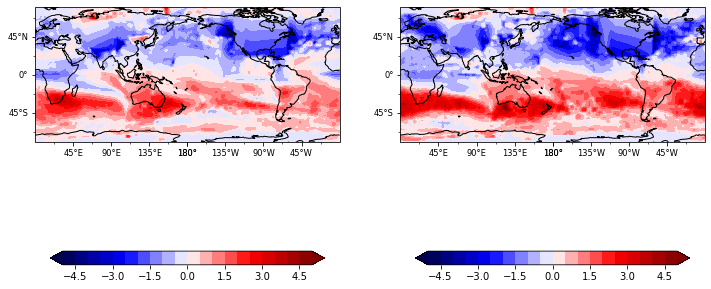

In [23]:
lonmin,lonmax,latmin,latmax  =  0.5,359.5,-80,80
extent     =  [lonmin,lonmax,latmin,latmax]
proj    =  ccrs.PlateCarree(central_longitude=180)
fig1    =  plt.figure(figsize=(12,10))


ax1     = fig1.add_subplot(121,projection=proj)
ax1.coastlines(resolution='110m',lw=1)

# 设置经纬度刻度.
set_map_ticks(ax1, dx=45, dy=45, nx=1, ny=1, labelsize='small')
ax1.set_extent(extent, crs=proj)
           #
#ax.plot([40,120],[0,0],'k--')
im1  =  ax1.contourf(f0.lon,f0.lat,winter_anomoly,levels=np.linspace(-5,5,21),cmap='seismic',alpha=1,extend='both')
#im1  =  ax1.contour(f0.lon,f0.lat,winter_anomoly,20,alpha=1,extend='both')

cbar = fig1.colorbar(im1, ax=ax1, shrink=0.9, pad=0.2, orientation='horizontal')

ax2     = fig1.add_subplot(122,projection=proj)
ax2.coastlines(resolution='110m',lw=1)
# 设置经纬度刻度.
set_map_ticks(ax2, dx=45, dy=45, nx=1, ny=1, labelsize='small')
ax2.set_extent(extent, crs=proj)
           #
#ax.plot([40,120],[0,0],'k--')
im2  =  ax2.contourf(f0.lon,f0.lat,december_anomoly,levels=np.linspace(-5,5,21),cmap='seismic',alpha=1,extend='both')
#im2  =  ax2.contour(f0.lon,f0.lat,december_anomoly,20,alpha=1,extend='both')

cbar = fig1.colorbar(im2, ax=ax2, shrink=0.9, pad=0.2, orientation='horizontal')


plt.savefig("/home/sun/paint/liuxl/winter_anomoly.pdf",dpi=300)
#plt.tight_layout()

In [7]:
f0.sst.data[30,50,:]

array([19.449999 , 19.41     , 19.359999 , 19.34     , 19.39     ,
       19.35     , 19.24     , 19.1      , 19.039999 , 19.05     ,
       19.189999 , 19.43     , 19.75     , 20.1      , 20.439999 ,
       20.68     , 20.49     , 20.27     , 20.16     , 20.16     ,
       20.289999 , 20.539999 , 20.98     , 21.189999 , 21.42     ,
       21.84     , 22.17     , 21.67     , 20.66     , 20.66     ,
       21.039999 , 21.3      , 21.34     , 21.31     , 21.21     ,
       21.09     , 21.       , 20.96     , 20.98     , 20.99     ,
       20.98     , 20.939999 , 20.869999 , 20.779999 , 20.699999 ,
       20.619999 , 20.529999 , 20.43     , 20.27     , 20.199999 ,
       20.25     , 20.4      , 20.59     , 20.75     , 20.609999 ,
       20.9      , 21.199999 , 21.15     , 20.92     , 20.68     ,
       20.439999 , 20.17     , 19.89     , 19.67     , 19.539999 ,
       19.4      , 19.13     , 18.65     , 18.09     , 17.66     ,
       17.44     , 17.34     , 17.3      , 17.289999 , 17.3   